🔼 Please upload the ZIP file containing your CSV dataset...


Saving archive (2).zip to archive (2) (8).zip
✅ Extracted Files: ['heart_disease_uci.csv']
✅ CSV Loaded Successfully!


📌 Dataset Preview:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       f

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


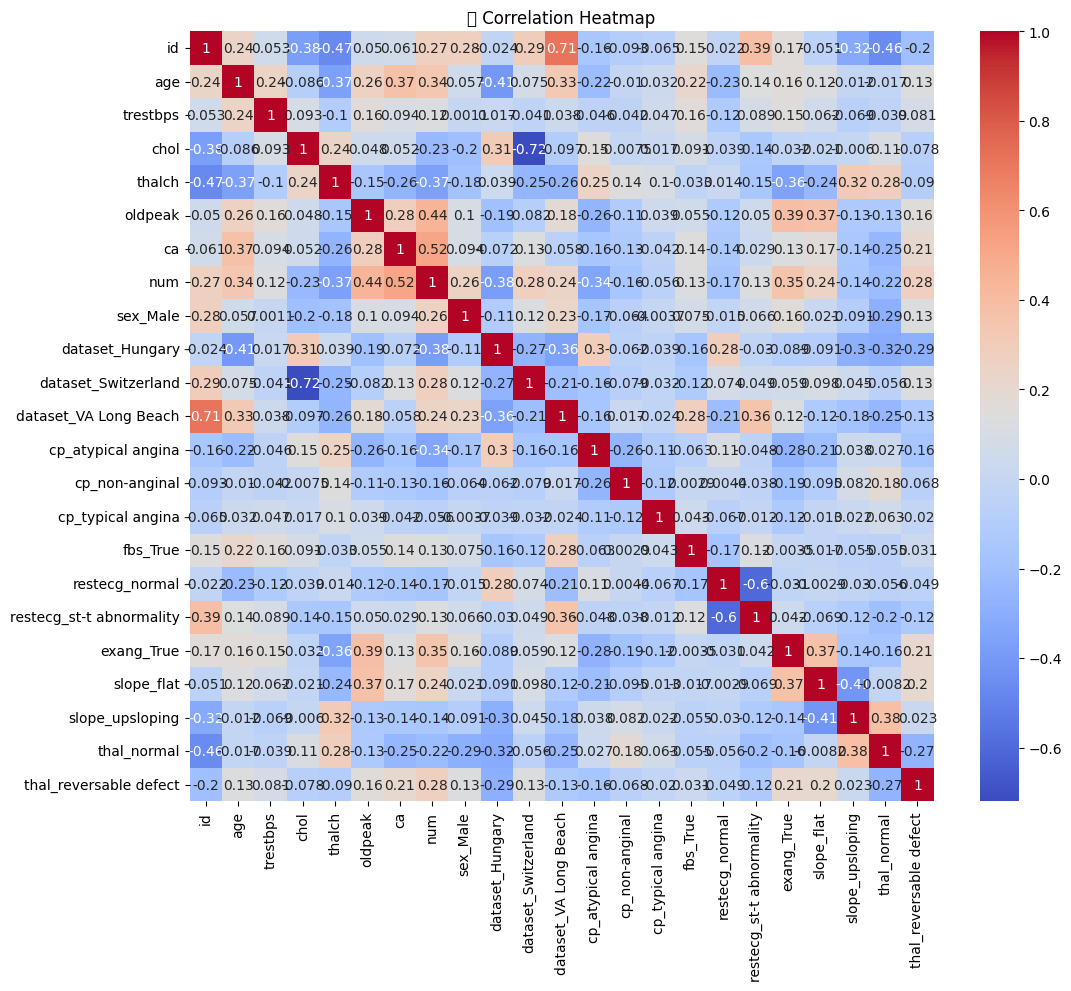


✅ Model Accuracy: 0.7554

📋 Classification Report:
               precision    recall  f1-score   support

       False       0.48      0.27      0.35        44
        True       0.80      0.91      0.85       140

    accuracy                           0.76       184
   macro avg       0.64      0.59      0.60       184
weighted avg       0.72      0.76      0.73       184



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


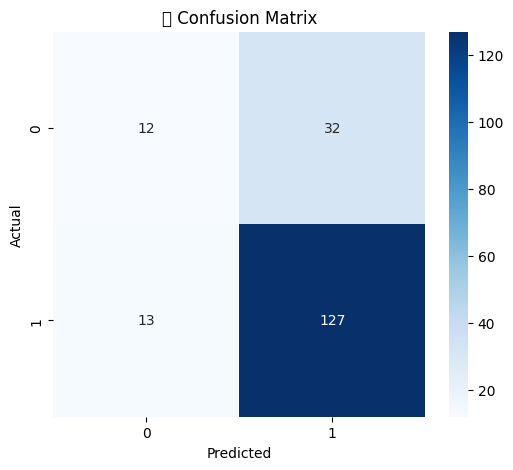

<ipython-input-9-1ac99798e5e1>:110: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


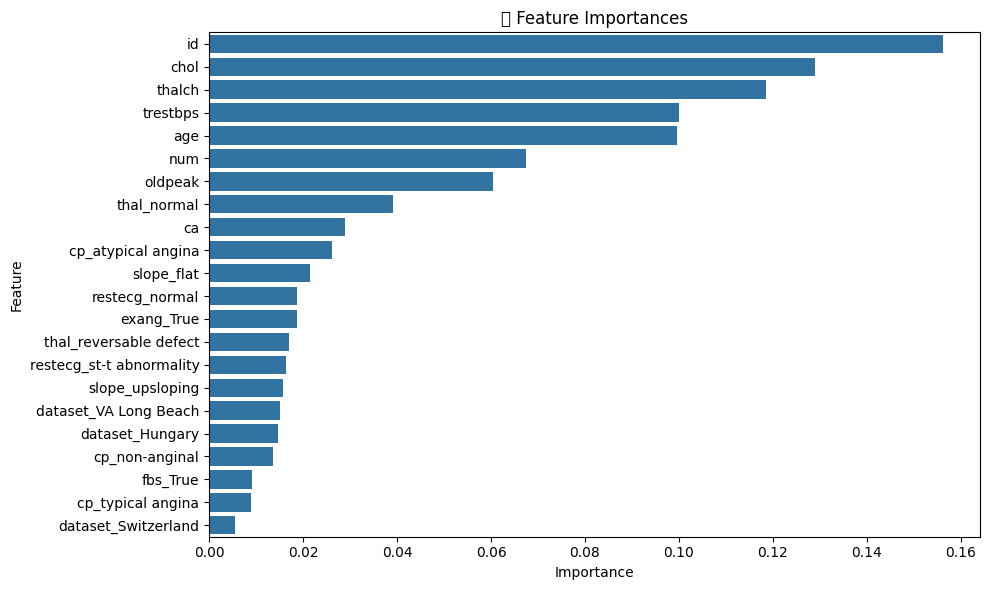

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


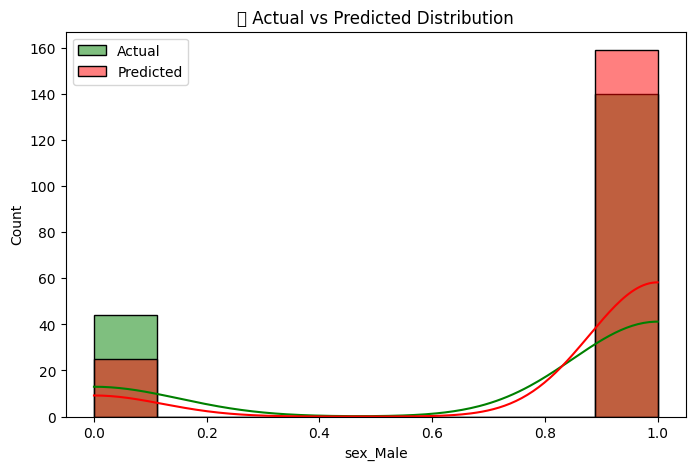


🔮 First 20 Predictions:
Actual: [ True  True  True  True False False  True  True  True False  True  True
 False  True  True  True  True  True  True  True]
Predicted: [ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True False  True  True  True  True]


In [9]:
# 💡 Heart Disease Prediction using Random Forest

# ✅ Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import zipfile
import io
from google.colab import files
import os

# ✅ Step 2: Upload ZIP File
print("🔼 Please upload the ZIP file containing your CSV dataset...")
uploaded = files.upload()

# ✅ Step 3: Extract ZIP and Find CSV
csv_path = None
for fname in uploaded.keys():
    if fname.endswith('.zip'):
        with zipfile.ZipFile(io.BytesIO(uploaded[fname]), 'r') as zip_ref:
            zip_ref.extractall("/content/heart_data")
            print("✅ Extracted Files:", zip_ref.namelist())
            for file in zip_ref.namelist():
                if file.endswith('.csv'):
                    csv_path = os.path.join("/content/heart_data", file)

# ✅ Step 4: Load CSV into DataFrame
if csv_path:
    df = pd.read_csv(csv_path)
    print("✅ CSV Loaded Successfully!\n")
else:
    raise Exception("❌ No CSV found inside the ZIP!")

# ✅ Step 5: Dataset Preview and Null Check
print("\n📌 Dataset Preview:")
print(df.head())

print("\n🔍 Null Values:")
print(df.isnull().sum())

# ✅ Step 6: Encode Non-Numeric Columns (if any)
non_numeric_cols = df.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print(f"\n🔧 Encoding non-numeric columns: {list(non_numeric_cols)}")
    df = pd.get_dummies(df, drop_first=True)
else:
    print("\n✅ No non-numeric columns found.")

# ✅ Step 7: Detect Target Column AFTER Encoding
binary_targets = [col for col in df.columns if df[col].nunique() == 2]
if len(binary_targets) == 0:
    raise Exception("❌ No binary target column found!")
elif len(binary_targets) == 1:
    target_col = binary_targets[0]
    print(f"\n🎯 Target column detected: '{target_col}'")
else:
    print(f"\n🧠 Multiple binary columns found. Defaulting to: '{binary_targets[0]}'")
    print("Others:", binary_targets)
    target_col = binary_targets[0]

# ✅ Step 8: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("📊 Correlation Heatmap")
plt.show()

# ✅ Step 9: Split Dataset
X = df.drop(target_col, axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 10: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Step 11: Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ✅ Step 12: Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.4f}")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Step 13: Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("🔍 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Step 14: Feature Importances
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title("📈 Feature Importances")
plt.tight_layout()
plt.show()

# ✅ Step 15: Actual vs Predicted Plot
plt.figure(figsize=(8, 5))
sns.histplot(y_test, color='green', label='Actual', kde=True)
sns.histplot(y_pred, color='red', label='Predicted', kde=True)
plt.title("📉 Actual vs Predicted Distribution")
plt.legend()
plt.show()

# ✅ Step 16: Print Predictions (Optional)
print("\n🔮 First 20 Predictions:")
print("Actual:", y_test.values[:20])
print("Predicted:", y_pred[:20])
